In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [6]:
ExampleData = pd.read_csv('./ExampleData', sep=',', names=['time', 'Acc(Ra)', 'Acc(Ax)', 'AE'])
ExampleData.shape

In [12]:
StartPoint = np.where(ExampleData.iloc[:,0].values == 10)[0][0]
EndPoint   = np.where(ExampleData.iloc[:,0].values == 11)[0][0]
NewData    = ExampleData.iloc[StartPoint:EndPoint, :]
NewData.shape

(12794, 4)

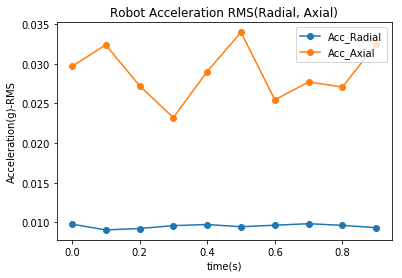

In [13]:
partFeature = np.zeros(shape=(10,NewData.shape[1]-1))

for i in range(1,NewData.shape[1]):
    for j in range(10):
        partFeature[j,i-1] = (np.sqrt(np.mean(NewData.iloc[1280*(j):1280*(j+1),i]**2)))

partFeature = pd.DataFrame(partFeature)

plt.plot(np.arange(0,1,0.1) , partFeature.iloc[:,0],'-o')
plt.plot(np.arange(0,1,0.1) , partFeature.iloc[:,1],'-o')
plt.xlabel('time(s)')
plt.ylabel('Acceleration(g)-RMS')
plt.title('Robot Acceleration RMS(Radial, Axial)')
plt.legend(['Acc_Radial', 'Acc_Axial'], loc = 'upper right', fontsize=10)